<a href="https://colab.research.google.com/github/sabumjung/Machine-Learning-Algorithm/blob/master/ch14_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#다층 퍼셉트론을 이용해 분류 실행하기

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.contrib.layers as tfl

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from mpl_toolkits.mplot3d import Axes3D

In [0]:
nb_samples = 1000
nb_features = 3
nb_epochs = 200
batch_size = 50

# For reproducibility
np.random.seed(1000)

In [0]:
# Create the dataset
X, Y = make_classification(n_samples=nb_samples, n_features=nb_features,
                           n_informative=3, n_redundant=0, n_classes=2, n_clusters_per_class=3)

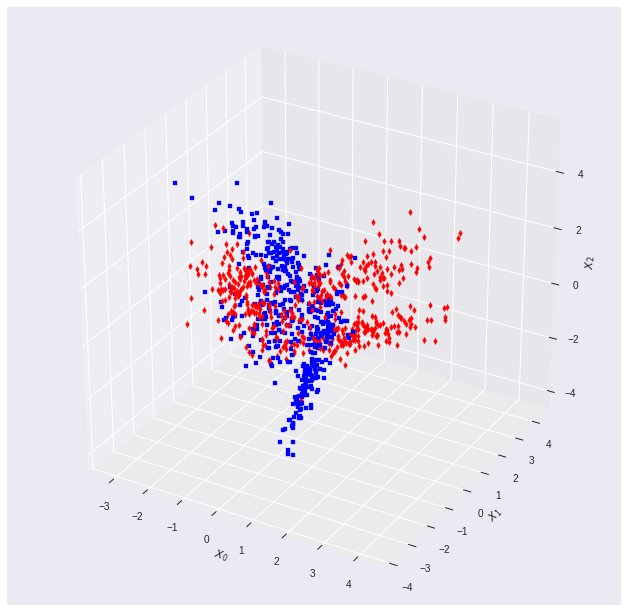

In [82]:
# Show the dataset
fig = plt.figure(figsize=(11, 11))
ax = fig.add_subplot(111, projection='3d')

for i, x in enumerate(X):
    if Y[i] == 0:
        ax.scatter(x[0], x[1], x[2], marker='s', color='blue')
    elif Y[i] == 1:
        ax.scatter(x[0], x[1], x[2], marker='d', color='red')

ax.set_xlabel(r'$X_0$')
ax.set_ylabel(r'$X_1$')
ax.set_zlabel(r'$X_2$')
plt.show()

In [0]:
# Create train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [84]:
# Create the graph
graph = tf.Graph()

with graph.as_default():
    Xt = tf.placeholder(tf.float32, shape=(None, nb_features), name='X')
    Yt = tf.placeholder(tf.float32, shape=(None, 1), name='Y')

    layer_1 = tfl.fully_connected(Xt, num_outputs=50, activation_fn=tf.tanh)
    layer_2 = tfl.fully_connected(layer_1, num_outputs=1, activation_fn=tf.sigmoid)

    Yo = tf.round(layer_2)

    loss = tf.nn.l2_loss(layer_2 - Yt)
    training_step = tf.train.GradientDescentOptimizer(0.025).minimize(loss)

session = tf.InteractiveSession(graph=graph)
tf.global_variables_initializer().run()

/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [85]:
# Run the training cycle
for e in range(nb_epochs):
    total_loss = 0.0
    Xb = np.ndarray(shape=(batch_size, nb_features), dtype=np.float32)
    Yb = np.ndarray(shape=(batch_size, 1), dtype=np.float32)

    for i in range(0, X_train.shape[0] - batch_size, batch_size):
        Xb[:, :] = X_train[i:i + batch_size, :]
        Yb[:, 0] = Y_train[i:i + batch_size]

        loss_value, _ = session.run([loss, training_step], feed_dict={Xt: Xb, Yt: Yb})
        total_loss += loss_value

    Y_predicted = session.run([Yo], feed_dict={Xt: X_test.reshape((X_test.shape[0], nb_features))})
    accuracy = 1.0 - (np.sum(np.abs(np.array(Y_predicted[0]).squeeze(axis=1) - Y_test)) / float(Y_test.shape[0]))

    print('Epoch %d) Total loss: %.2f - Accuracy: %.2f' % (e, total_loss, accuracy))

Epoch 0) Total loss: 83.10 - Accuracy: 0.70
Epoch 1) Total loss: 80.12 - Accuracy: 0.69
Epoch 2) Total loss: 79.05 - Accuracy: 0.71
Epoch 3) Total loss: 77.80 - Accuracy: 0.72
Epoch 4) Total loss: 76.20 - Accuracy: 0.72
Epoch 5) Total loss: 74.06 - Accuracy: 0.73
Epoch 6) Total loss: 71.22 - Accuracy: 0.77
Epoch 7) Total loss: 67.60 - Accuracy: 0.81
Epoch 8) Total loss: 63.39 - Accuracy: 0.83
Epoch 9) Total loss: 59.03 - Accuracy: 0.85
Epoch 10) Total loss: 54.98 - Accuracy: 0.86
Epoch 11) Total loss: 51.54 - Accuracy: 0.88
Epoch 12) Total loss: 48.76 - Accuracy: 0.88
Epoch 13) Total loss: 46.53 - Accuracy: 0.88
Epoch 14) Total loss: 44.74 - Accuracy: 0.89
Epoch 15) Total loss: 43.26 - Accuracy: 0.90
Epoch 16) Total loss: 42.02 - Accuracy: 0.90
Epoch 17) Total loss: 40.93 - Accuracy: 0.90
Epoch 18) Total loss: 39.97 - Accuracy: 0.91
Epoch 19) Total loss: 39.10 - Accuracy: 0.91
Epoch 20) Total loss: 38.30 - Accuracy: 0.91
Epoch 21) Total loss: 37.56 - Accuracy: 0.91
Epoch 22) Total loss